<a href="https://colab.research.google.com/github/lokeshkumarn/Notebooks/blob/master/2D_Deep_Neural_Network_with_L2%2CL1_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network with L2 /L1 Regularization using Keras

In [ ]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

## Dataset

In [ ]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

## DNN Model

Using Keras, create the DNN or Sequential Model

In [ ]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [ ]:
# Layer 1 = input layer
# specify the input size for in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)) )

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))

# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
_________________________________________________________________


## Regularization and Optimizations of DNN

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [ ]:
# train the model

h = dnnModel.fit( Xtrain, Ytrain, epochs=25, validation_split=0.2, batch_size=64)

Epoch 1/25
750/750 [==============================] - 2s 2ms/step - loss: 0.6818 - accuracy: 0.8836 - val_loss: 0.2928 - val_accuracy: 0.9507
Epoch 2/25
750/750 [==============================] - 2s 2ms/step - loss: 0.2398 - accuracy: 0.9545 - val_loss: 0.2028 - val_accuracy: 0.9590
Epoch 3/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.9672 - val_loss: 0.1629 - val_accuracy: 0.9653
Epoch 4/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1385 - accuracy: 0.9723 - val_loss: 0.1499 - val_accuracy: 0.9665
Epoch 5/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1171 - accuracy: 0.9760 - val_loss: 0.1366 - val_accuracy: 0.9687
Epoch 6/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1064 - accuracy: 0.9775 - val_loss: 0.1327 - val_accuracy: 0.9691
Epoch 7/25
750/750 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9803 - val_loss: 0.1371 - val_accuracy: 0.9667
Epoch 

In [ ]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.03937375172972679
Final training accuracy  0.9936249852180481


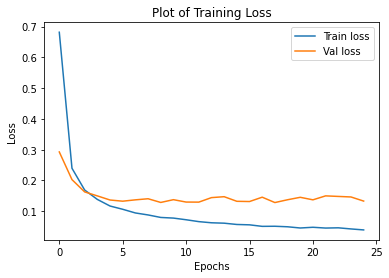

In [ ]:
# plot the training loss

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

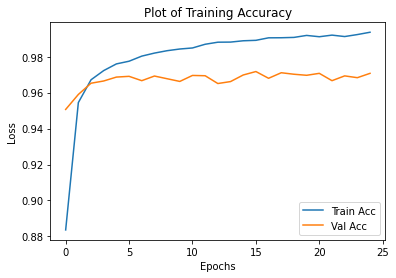

In [ ]:
# plot the training accuracy

plt.plot(h.history['accuracy'], label='Train Acc')
plt.plot(h.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

## Testing the Model

In [ ]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 0s 955us/step - loss: 0.1307 - accuracy: 0.9737


In [ ]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.13071686029434204
Testing accuracy  0.9736999869346619


Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer